# Deep Learning Classification Prediction of the Bank Marketing Dataset

### The Objective of the Deep Learning Project:

The dataset is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. This dataset contains 17 variables including 16 feature variables for prediction and one target variable indicating whether clients did the deposit subscription or not. The goal of this project is to build and train deep learning models using this bank marketing dataset and employ trained DL models to predict whether clients will subscribe the bank term deposit. As whether bank marketing can succeed is important for the business growth of banks, the DL model can be a useful predictive algorithm to identify the potential clients for marketing. This dataset was downloaded from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Bank+Marketing). Both sklearn.neural_network.MLPClassifier and tensorflow.keras packages were used to build artificial neural network (ANN) models for training and prediction.


### The description of the dataset:

This dataset is public available for research. The details are described in [Moro et al., 2014].

S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

**Input variables:**

bank client data:

1. age (numeric)
2. job : type of job (categorical: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services") 
3. marital : marital status (categorical: "married", "divorced", "single"; note: "divorced" means divorced or widowed)
4. education (categorical: "unknown", "secondary", "primary", "tertiary")
5. default: has credit in default? (binary: "yes","no")
6. balance: average yearly balance, in euros (numeric) 
7. housing: has housing loan? (binary: "yes","no")
8. loan: has personal loan? (binary: "yes","no")

related with the last contact of the current campaign:

9. contact: contact communication type (categorical: "unknown", "telephone", "cellular") 
10. day: last contact day of the month (numeric)
11. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
12. duration: last contact duration, in seconds (numeric)

other attributes:

13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: "unknown", "other", "failure", "success")

**Output variable (desired target):**

17. y - has the client subscribed a term deposit? (binary: "yes", "no")


In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the Bank Marketig data set
bank_df = pd.read_csv('data/bank-full.csv', delimiter = ';')
print(bank_df.shape)
bank_df.head()

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# Examine the data types of variables in the Bank Marketing data set
bank_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [4]:
# Examine the column names in the Bank Marketing data set and store them in col_names
col_names = bank_df.columns.to_list()
col_names

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [5]:
# Examine the portion of "yes" in the y target variable
bank_df['y'].value_counts(normalize = True)

no     0.883015
yes    0.116985
Name: y, dtype: float64

### An outline of the Deep Learning project plan:

1. The dataset was first examined to check whether there are any missing values in attributes. Missing values will be replaced by median values if they are found.
2. The categorical variables are engineered to be dummy variables. The integer variables are converted to float variables for the later scaling
3. Analysis of data distribution of each numeric feature variable and its skewness.
4. Exploratory data analysis of the correlation between feature and target variables.
5. A machine learning algorithm (RandomForestClassifier) is used to set a baseline of classification prediction.
6. Scaling is performed before the dataset is used to train deep learning models.
7. The scaled dataset is used in the training of deep learning models for supervised classification.
8. Deep learning models build from sklearn.neural_network.MLPClassifier and tensorflow.keras are evaluated to identify the best model for the bank marketing prediction.


### Data Cleaning and Feature Engineering:

To check whether the dataset contains any missing values, **isnull()** was used for this analysis.

In [6]:
# Check the missing data in the Bank Marketing data set
bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

The analysis result shows that there are no missing values present in these 17 attributes.



#### Some basic analyses were performed before data engineering:

In [7]:
# Examine the number of unique values of each variable in the Bank Marketing data set
for col in col_names:
    print(col + ": {}".format(bank_df[col].nunique()))

age: 77
job: 12
marital: 3
education: 4
default: 2
balance: 7168
housing: 2
loan: 2
contact: 3
day: 31
month: 12
duration: 1573
campaign: 48
pdays: 559
previous: 41
poutcome: 4
y: 2


In [8]:
# list the non-numeric variables
bank_df.dtypes[bank_df.dtypes.values=='object'].index.to_list()

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [9]:
# Examine the unique values of the 'poutcome' variable
bank_df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [10]:
# Examine the unique values of the 'month' variable
bank_df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [11]:
# Save the list of numeric column names in the object 'num_col'
num_col = bank_df.dtypes[bank_df.dtypes.values=='int64'].index.to_list()
num_col

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

Integer variables were converted to float variables for the later scaling purpose.

In [12]:
# Convert integer variables to the float datatype
for col in num_col:
    bank_df[col] = [float(x) for x in bank_df[col]]

In [13]:
bank_df.dtypes

age          float64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day          float64
month         object
duration     float64
campaign     float64
pdays        float64
previous     float64
poutcome      object
y             object
dtype: object

To convert categorical variables to dummy variables (0 or 1), **pandas.get_dummies()** was used.

In [14]:
# Convert non-numeric variables to dummy variables and save them in copied dataframe 'bank_df2'
bank_df2 = pd.get_dummies(bank_df, drop_first=True)
print(bank_df2.shape)
bank_df2.head()

(45211, 43)


,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58.0,2143.0,5.0,261.0,1.0,-1.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,44.0,29.0,5.0,151.0,1.0,-1.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33.0,2.0,5.0,76.0,1.0,-1.0,0.0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,47.0,1506.0,5.0,92.0,1.0,-1.0,0.0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,33.0,1.0,5.0,198.0,1.0,-1.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [15]:
bank_df2.dtypes

age                    float64
balance                float64
day                    float64
duration               float64
campaign               float64
pdays                  float64
previous               float64
job_blue-collar          uint8
job_entrepreneur         uint8
job_housemaid            uint8
job_management           uint8
job_retired              uint8
job_self-employed        uint8
job_services             uint8
job_student              uint8
job_technician           uint8
job_unemployed           uint8
job_unknown              uint8
marital_married          uint8
marital_single           uint8
education_secondary      uint8
education_tertiary       uint8
education_unknown        uint8
default_yes              uint8
housing_yes              uint8
loan_yes                 uint8
contact_telephone        uint8
contact_unknown          uint8
month_aug                uint8
month_dec                uint8
month_feb                uint8
month_jan                uint8
month_ju

After data engineering, the number of attributes increases from 17 to 43.



### Analysis of data distribution and skewness:

To understand the data distribution of each numeric feature, histogram analysis was performed.

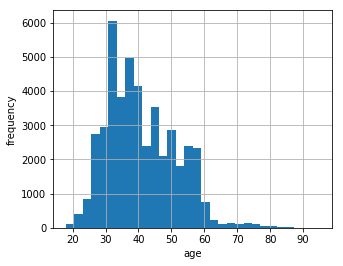

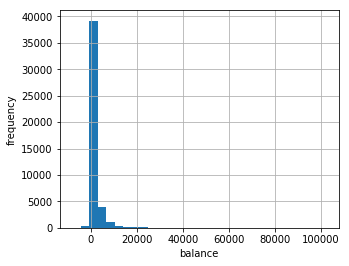

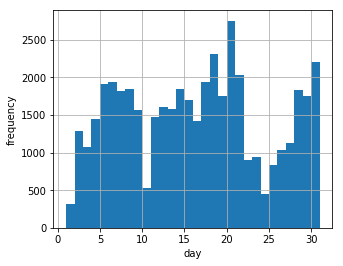

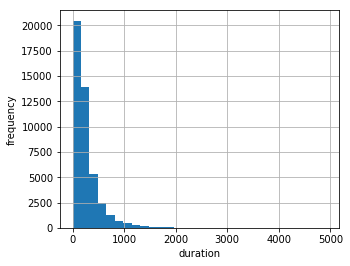

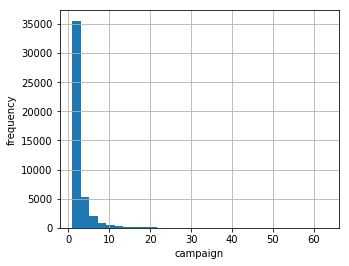

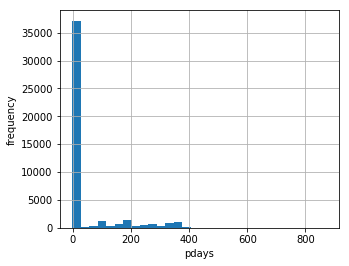

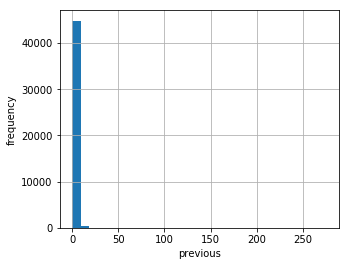

In [16]:
# Plot the distribution of numeric variables
for col in num_col:
    fig, ax = plt.subplots(1, 1, figsize=(5, 4))
    bank_df2[col].hist(ax=ax, bins=30).set(xlabel=col, ylabel='frequency')

The skewness of these numeric variables were analyzed.

In [17]:
# Examine the skewness of numeric variables
bank_df2.loc[:, num_col].skew()

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

The histogram and skewness analyses show that five numeric variables (balance, duration, campaign, pdays and previous) display the strong right-skewed distribution.

### The correlation between feature and target variables:

To examine the relationship between feature and target variables, their correlation analysis was performed.


In [18]:
# Examine the correlation between feature varaibles and the target variable
correlations = bank_df2.iloc[:, :-1].corrwith(bank_df2.iloc[:, -1])
correlations.sort_values(inplace=True)
correlations

poutcome_unknown      -0.167051
contact_unknown       -0.150935
housing_yes           -0.139173
month_may             -0.102500
campaign              -0.073172
job_blue-collar       -0.072083
loan_yes              -0.068185
marital_married       -0.060260
education_secondary   -0.036388
month_jul             -0.034382
day                   -0.028348
job_services          -0.027864
default_yes           -0.022419
job_entrepreneur      -0.019662
month_jun             -0.016805
job_housemaid         -0.015195
month_nov             -0.014937
job_technician        -0.008970
month_jan             -0.008783
month_aug             -0.008536
job_unknown            0.000267
job_self-employed      0.000855
education_unknown      0.012053
contact_telephone      0.014042
job_unemployed         0.020390
age                    0.025155
poutcome_other         0.031955
job_management         0.032919
month_feb              0.038417
balance                0.052838
marital_single         0.063526
educatio

The correlation analysis shows that the success of the outcome of the previous marketing campaign (poutcom_success) and the last contact duration (duration) moderately correlate with the target variable (y) in a positive manner

### RandomForest Prediction:

Before performing deep learning modeling, the classification prediction using RandomForestClassifier from sklearn was conducted first to set a baseline for the prediction performance in comparison to deep learning models.

Before the training of RandomForestClassifier models, feature and target datasets were created from the engineered data. Data scaling is not necessary for training RandomForestClassifier models.


In [19]:
# Create feature and target data sets in a numpy array format
X = bank_df2.iloc[:, :-1].values
y = bank_df2.iloc[:, -1].values

In [20]:
print(X.shape)
X

(45211, 42)


array([[5.800e+01, 2.143e+03, 5.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [4.400e+01, 2.900e+01, 5.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [3.300e+01, 2.000e+00, 5.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [7.200e+01, 5.715e+03, 1.700e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [5.700e+01, 6.680e+02, 1.700e+01, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [3.700e+01, 2.971e+03, 1.700e+01, ..., 1.000e+00, 0.000e+00,
        0.000e+00]])

In [21]:
print(y.shape)
y

(45211,)


array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [22]:
# Load required sklearn packages for RandomForestClassifier prediction
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve, accuracy_score, classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier

After importing required **sklearn** packages, **train_test_split** was used to create train and test datasets.

In [23]:
# Split the data to Train, and Test (75%, 25%) data sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

To identify the best random tree number for **RandomForestClassifier** in classification prediction, a range of tree numbers were tested in training **RandomForestClassifier** models.

In [24]:
# Analyzing the impact of the tree number on the classification prediction performance by RandomForestClassifier
acc_score = []
roc_auc = []
f1_sco = []
for n in range(20, 201, 20):
    model = RandomForestClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    y_pred_class = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)
    acc_score.append(accuracy_score(y_test,y_pred_class))
    roc_auc.append(roc_auc_score(y_test,y_pred_prob[:,1]))
    f1_sco.append(f1_score(y_test,y_pred_class))

The accuracy, ROC-AUC and f1 scores are summarized as following:

In [25]:
Score_df = pd.DataFrame({'Tree_n':range(20, 201, 20), 'Accuracy':round(pd.Series(acc_score), 4),
                        'ROC_AUC':round(pd.Series(roc_auc), 4), 'f1_score':round(pd.Series(f1_sco),3)})
Score_df

,Tree_n,Accuracy,ROC_AUC,f1_score
0,20,0.9077,0.9179,0.483
1,40,0.9101,0.9284,0.504
2,60,0.9121,0.9334,0.523
3,80,0.9124,0.9341,0.521
4,100,0.9107,0.9330,0.509
5,120,0.9118,0.9353,0.519
6,140,0.9126,0.9358,0.523
7,160,0.9101,0.9351,0.506
8,180,0.9106,0.9358,0.507
9,200,0.9120,0.9359,0.519


These stored scores were plotted as follows:

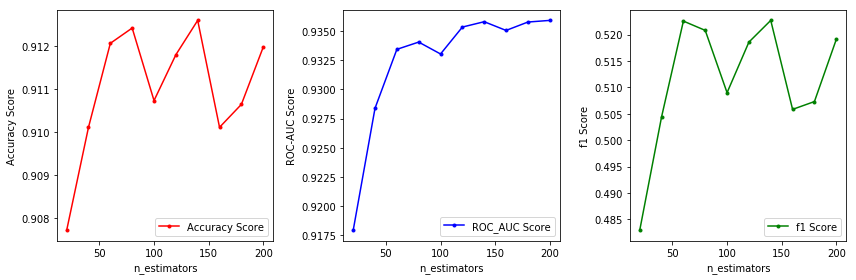

In [26]:
# The plot view of the impact of the tree number on the classification prediction performance by RandomForestClassifier
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
ax1.plot(range(20, 201, 20), acc_score, 'r', marker='.', label="Accuracy Score")
ax2.plot(range(20, 201, 20), roc_auc, 'b', marker='.', label="ROC_AUC Score")
ax3.plot(range(20, 201, 20), f1_sco, 'g', marker='.', label="f1 Score")
ax1.legend()
ax2.legend()
ax3.legend()
ax1.set(xlabel='n_estimators', ylabel='Accuracy Score')
ax2.set(xlabel='n_estimators', ylabel='ROC-AUC Score')
ax3.set(xlabel='n_estimators', ylabel='f1 Score')
fig.tight_layout();

When n_estimators is 140, **RandomForestClassifier** provided the best prediction for the test dataset (accuracy = 0.9126, ROC-AUC score = 0.9358, f1 score = 0.523).

In [27]:
# Create a function to plot the roc curve
# fpr - false positive rate; tpr - true positive rate; thr - threshold
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on Bank Marketing Prediction'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

accuracy is 0.912
roc-auc is 0.936
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10012
           1       0.69      0.42      0.52      1291

    accuracy                           0.91     11303
   macro avg       0.81      0.70      0.74     11303
weighted avg       0.90      0.91      0.90     11303



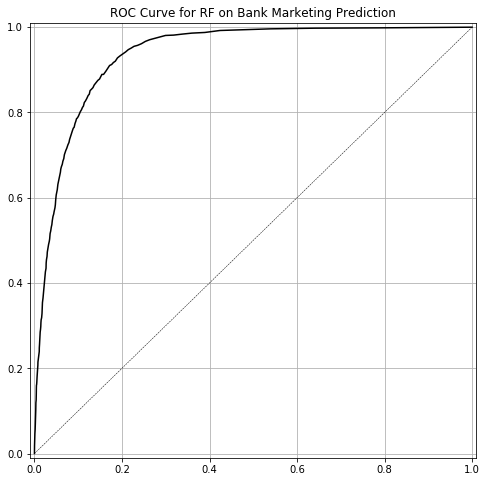

In [28]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob[:,1])))
print(classification_report(y_test,y_pred_class))
plot_roc(y_test, y_pred_prob[:, 1], 'RF')

### Data Scaling:

As deep learning is sensitive to the scales of variable data, train and test datasets were scaled using the **MinMaxScaler()** function from **sklearn.preprocessing**.

In [29]:
# Perform scaling of train and test data sets using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_train_sc = mm.fit_transform(X_train)
X_test_sc = mm.transform(X_test)
print(X_train.shape, X_train_sc.shape, X_test.shape, X_test_sc.shape)
X_train_sc

(33908, 42) (33908, 42) (11303, 42) (11303, 42)


array([[0.45454545, 0.05290122, 0.53333333, ..., 0.        , 0.        ,
        0.        ],
       [0.32467532, 0.14805707, 0.73333333, ..., 0.        , 1.        ,
        0.        ],
       [0.53246753, 0.04726077, 0.7       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.32467532, 0.03959053, 0.36666667, ..., 0.        , 0.        ,
        1.        ],
       [0.32467532, 0.03959053, 0.63333333, ..., 0.        , 0.        ,
        1.        ],
       [0.25974026, 0.06353807, 0.43333333, ..., 0.        , 0.        ,
        1.        ]])

In [30]:
X_test_sc

array([[0.09090909, 0.05037375, 0.96666667, ..., 0.        , 0.        ,
        0.        ],
       [0.41558442, 0.0741066 , 0.76666667, ..., 0.        , 0.        ,
        1.        ],
       [0.12987013, 0.04362082, 0.7       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.31168831, 0.03959053, 0.16666667, ..., 0.        , 0.        ,
        1.        ],
       [0.22077922, 0.03882936, 0.9       , ..., 0.        , 0.        ,
        1.        ],
       [0.24675325, 0.04057615, 0.53333333, ..., 0.        , 0.        ,
        1.        ]])

### Deep neural learning using MLPClassifier:

**MLPClassifier** from **sklearn.neural_network** was first used as a builder to create deep neural network models.

In [31]:
from sklearn.neural_network import MLPClassifier

The simple neural network models with one hidden layer were tested in three different activation functions (logistic, tanh, relu) and in a range of neural nodes (16, 32, 48, 64, 80, 96) using **MLPClassifier**.

In [33]:
act_func = ['logistic', 'tanh', 'relu']
nn_acc = dict()
nn_auc = dict()
f1_sco = dict()

nn_acc[act_func[0]] = []
nn_acc[act_func[1]] = []
nn_acc[act_func[2]] = []

nn_auc[act_func[0]] = []
nn_auc[act_func[1]] = []
nn_auc[act_func[2]] = []

f1_sco[act_func[0]] = []
f1_sco[act_func[1]] = []
f1_sco[act_func[2]] = []

for func in act_func:
    for n in range(16, 97, 16):
        MLP_model = MLPClassifier(hidden_layer_sizes=(n,), activation=func, max_iter=100)
        MLP_model.fit(X_train_sc, y_train)
        y_pred_mlp = MLP_model.predict(X_test_sc)
        y_pred_prob_mlp = MLP_model.predict_proba(X_test_sc)
        nn_acc[func].append(accuracy_score(y_test,y_pred_mlp))
        nn_auc[func].append(roc_auc_score(y_test,y_pred_prob_mlp[:,1]))
        f1_sco[func].append(f1_score(y_test,y_pred_mlp))
        

C:\Users\Pang-Kuo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Pang-Kuo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Pang-Kuo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Pang-Kuo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_it

The accuracy, ROC-AUC and f1 scores for different numbers of neural nodes and distinct activation functions are summarized as following:

In [34]:
nn_acc_df = pd.DataFrame(nn_acc)
nn_acc_df['node_n'] = list(range(16, 97, 16))
nn_acc_df = nn_acc_df.iloc[:, [3,0,1,2]]
nn_acc_df.style.set_caption("Accuracy Scores for Different Activation Functions")

,node_n,logistic,tanh,relu
0,16,0.908962,0.909847,0.911528
1,32,0.908697,0.912236,0.912413
2,48,0.907812,0.910643,0.912236
3,64,0.908343,0.910643,0.911705
4,80,0.907724,0.911439,0.912943
5,96,0.907635,0.909847,0.90967


In [35]:
nn_auc_df = pd.DataFrame(nn_auc)
nn_auc_df['node_n'] = list(range(16, 97, 16))
nn_auc_df = nn_auc_df.iloc[:, [3,0,1,2]]
nn_auc_df.style.set_caption("ROC-AUC Scores for Different Activation Functions")

,node_n,logistic,tanh,relu
0,16,0.920383,0.930992,0.930285
1,32,0.920128,0.932535,0.932783
2,48,0.921559,0.931018,0.933046
3,64,0.919545,0.932442,0.931928
4,80,0.918649,0.93238,0.933123
5,96,0.919483,0.931658,0.932252


In [36]:
f1_sco_df = pd.DataFrame(f1_sco)
f1_sco_df['node_n'] = list(range(16, 97, 16))
f1_sco_df = f1_sco_df.iloc[:, [3,0,1,2]]
f1_sco_df.style.set_caption("f1 Scores for Different Activation Functions")

,node_n,logistic,tanh,relu
0,16,0.509299,0.536608,0.556344
1,32,0.50622,0.547445,0.559216
2,48,0.506161,0.516746,0.535145
3,64,0.517691,0.527154,0.540092
4,80,0.489976,0.532898,0.551913
5,96,0.488235,0.534065,0.534003


Among these three different activation functions, **tanh** and **relu** had the similar performance in prediction and they were better than **logistic**. 32 neural nodes are sufficient for deep learning with one hidden layer when **tanh** and **relu** are used as the activation function. The default of the optimizer in **MLPClassifier** is **Adam**.

Based on these testing results, two deep neural network models with one hidden layer (32 nodes with either tanh or relu) were evaluated.

C:\Users\Pang-Kuo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy is 0.912
roc-auc is 0.932
f1-score is 0.555
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10012
           1       0.65      0.48      0.56      1291

    accuracy                           0.91     11303
   macro avg       0.80      0.72      0.75     11303
weighted avg       0.90      0.91      0.91     11303



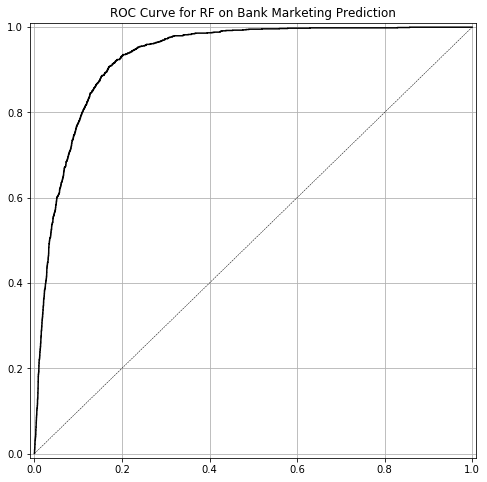

In [37]:
MLP_model_relu = MLPClassifier(hidden_layer_sizes=(32,), activation='relu', max_iter=200, random_state = 1234)
MLP_model_relu.fit(X_train_sc, y_train)
y_pred_mlp = MLP_model_relu.predict(X_test_sc)
y_pred_prob_mlp = MLP_model_relu.predict_proba(X_test_sc)
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_mlp)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_mlp[:,1])))
print('f1-score is {:.3f}'.format(f1_score(y_test,y_pred_mlp)))
print(classification_report(y_test, y_pred_mlp))
plot_roc(y_test, y_pred_prob_mlp[:, 1], 'RF')

C:\Users\Pang-Kuo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy is 0.911
roc-auc is 0.933
f1-score is 0.545
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10012
           1       0.65      0.47      0.55      1291

    accuracy                           0.91     11303
   macro avg       0.79      0.72      0.75     11303
weighted avg       0.90      0.91      0.90     11303



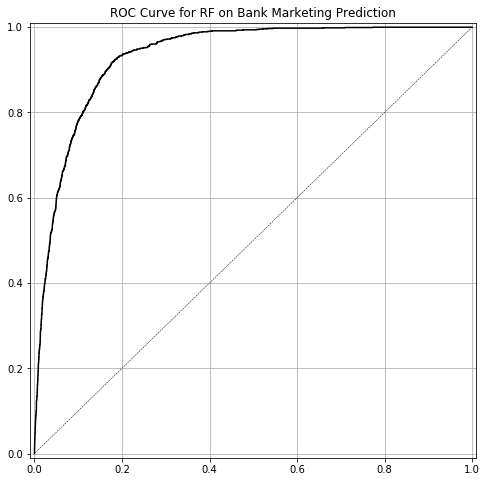

In [38]:
MLP_model_tanh = MLPClassifier(hidden_layer_sizes=(32,), activation='tanh', max_iter=200, random_state = 1234)
MLP_model_tanh.fit(X_train_sc, y_train)
y_pred_mlp = MLP_model_tanh.predict(X_test_sc)
y_pred_prob_mlp = MLP_model_tanh.predict_proba(X_test_sc)
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_mlp)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_mlp[:,1])))
print('f1-score is {:.3f}'.format(f1_score(y_test,y_pred_mlp)))
print(classification_report(y_test, y_pred_mlp))
plot_roc(y_test, y_pred_prob_mlp[:, 1], 'RF')

These two different neural network models that used distinct activation functions performed similarly in classification prediction according to their accuracy, ROC-AUC and f1 scores.

### Evaluation of neural network models with multiple hidden layers

To understand whether neural network models with multiple hidden layers can improve the classification prediction, five neural network models involving three hidden layers with various neural nodes were trained and tested in the performance of classification prediction. The **relu** function and the **Adam** optimizer were used in these NN models. 

In [39]:
MLP_model_1 = MLPClassifier(hidden_layer_sizes=(16,16,4), activation='relu', max_iter=200, random_state = 1234)
MLP_model_1.fit(X_train_sc, y_train)
y_pred_mlp = MLP_model_1.predict(X_test_sc)
y_pred_prob_mlp = MLP_model.predict_proba(X_test_sc)

C:\Users\Pang-Kuo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy is 0.907
roc-auc is 0.932
f1-score is 0.586
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     10012
           1       0.59      0.58      0.59      1291

    accuracy                           0.91     11303
   macro avg       0.77      0.76      0.77     11303
weighted avg       0.91      0.91      0.91     11303



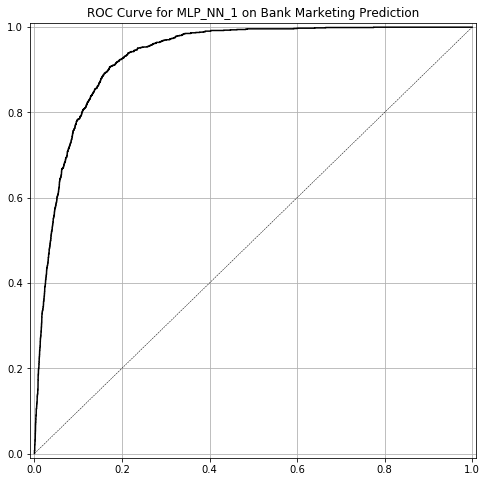

In [40]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_mlp)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_mlp[:,1])))
print('f1-score is {:.3f}'.format(f1_score(y_test,y_pred_mlp)))
print(classification_report(y_test, y_pred_mlp))
plot_roc(y_test, y_pred_prob_mlp[:, 1], 'MLP_NN_1')

In [41]:
MLP_model_1.get_params

<bound method BaseEstimator.get_params of MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(16, 16, 4), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1234, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)>

In [42]:
MLP_model_1.coefs_

[array([[-1.12297399e-01,  1.19591458e-02,  1.51580690e-01,
          3.42596431e-01,  6.22706528e-02, -1.68768779e-01,
         -3.73895132e-02,  1.64518037e-01,  5.83316011e-01,
          5.00901378e-01, -1.09236663e-01, -1.31362596e-01,
         -2.74256929e-01,  1.84307455e-01,  6.59557268e-02,
          1.19281375e-01],
        [-7.73193898e-02, -1.05900205e-01,  5.76026072e-02,
          3.51082602e-01, -4.63966182e-01, -7.89046982e-02,
         -1.21049466e-01,  4.79087116e-01,  5.76018906e-01,
         -5.98055663e-02, -1.27375725e-01, -1.86867087e-02,
          2.14394136e-01, -9.76294967e-02,  3.83803585e-01,
          1.87316921e-01],
        [-3.47823390e-01, -1.31218013e-01,  2.80881507e-01,
          3.13823683e-01, -3.99908293e-01,  1.28678862e+00,
          3.77176143e-01,  5.79068480e-01, -8.17492037e-01,
         -6.84273606e-01,  1.81029625e-01,  5.75305311e-01,
         -1.58112754e-01,  4.53607255e-01, -3.89038340e-01,
          2.94923333e-01],
        [ 1.5883931

In [43]:
print("Layer 1: ", MLP_model_1.coefs_[0].shape)
print("Layer 2: ", MLP_model_1.coefs_[1].shape)
print("Layer 3: ", MLP_model_1.coefs_[2].shape)
print("Output Layer: ", MLP_model_1.coefs_[3].shape)

Layer 1:  (42, 16)
Layer 2:  (16, 16)
Layer 3:  (16, 4)
Output Layer:  (4, 1)


In [44]:
# The total number of trainable parameters for MLP_model_1
lay1 = 42*16 + 16
lay2 = 16*16 + 16
lay3 = 16*4 + 4
lay4 = 4*1 + 1
print("Total trainable parameters for MLP_model_1: ", lay1 + lay2 + lay3 + lay4)

Total trainable parameters for MLP_model_1:  1033


In [45]:
MLP_model_2 = MLPClassifier(hidden_layer_sizes=(150,100,50), activation='relu', max_iter=200, random_state = 1234)
MLP_model_2.fit(X_train_sc, y_train)
y_pred_mlp = MLP_model_2.predict(X_test_sc)
y_pred_prob_mlp = MLP_model_2.predict_proba(X_test_sc)

accuracy is 0.880
roc-auc is 0.869
f1-score is 0.500
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     10012
           1       0.48      0.52      0.50      1291

    accuracy                           0.88     11303
   macro avg       0.71      0.72      0.72     11303
weighted avg       0.89      0.88      0.88     11303



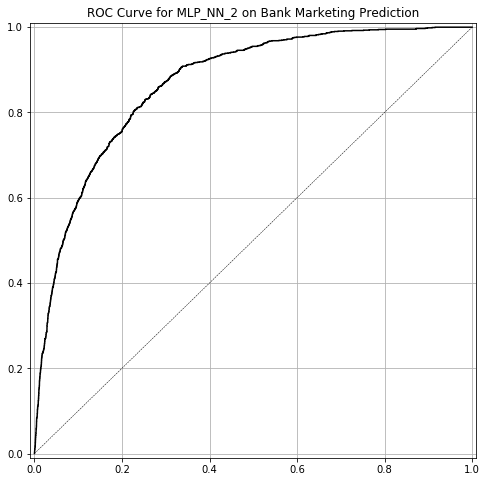

In [46]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_mlp)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_mlp[:,1])))
print('f1-score is {:.3f}'.format(f1_score(y_test,y_pred_mlp)))
print(classification_report(y_test, y_pred_mlp))
plot_roc(y_test, y_pred_prob_mlp[:, 1], 'MLP_NN_2')

In [47]:
print("Layer 1: ", MLP_model_2.coefs_[0].shape)
print("Layer 2: ", MLP_model_2.coefs_[1].shape)
print("Layer 3: ", MLP_model_2.coefs_[2].shape)
print("Output Layer: ", MLP_model_2.coefs_[3].shape)

Layer 1:  (42, 150)
Layer 2:  (150, 100)
Layer 3:  (100, 50)
Output Layer:  (50, 1)


In [48]:
# The total number of trainable parameters for MLP_model_2
lay1 = 42*150 + 150
lay2 = 150*100 + 100
lay3 = 100*50 + 50
lay4 = 50*1 + 1
print("Total trainable parameters for MLP_model_2: ", lay1 + lay2 + lay3 + lay4)

Total trainable parameters for MLP_model_2:  26651


In [49]:
MLP_model_3 = MLPClassifier(hidden_layer_sizes=(64,16,4), activation='relu', max_iter=200, random_state = 1234)
MLP_model_3.fit(X_train_sc, y_train)
y_pred_mlp = MLP_model_3.predict(X_test_sc)
y_pred_prob_mlp = MLP_model_3.predict_proba(X_test_sc)

C:\Users\Pang-Kuo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy is 0.902
roc-auc is 0.907
f1-score is 0.507
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     10012
           1       0.60      0.44      0.51      1291

    accuracy                           0.90     11303
   macro avg       0.76      0.70      0.73     11303
weighted avg       0.89      0.90      0.90     11303



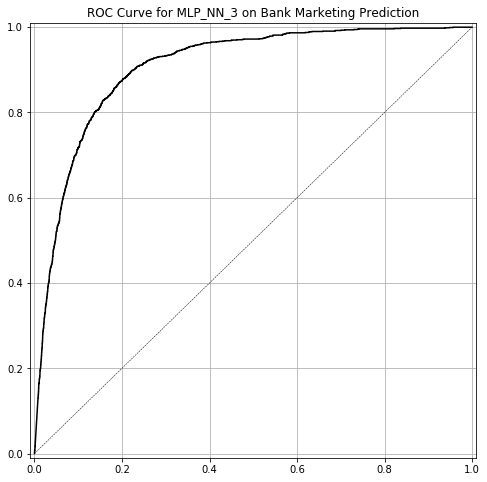

In [50]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_mlp)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_mlp[:,1])))
print('f1-score is {:.3f}'.format(f1_score(y_test,y_pred_mlp)))
print(classification_report(y_test, y_pred_mlp))
plot_roc(y_test, y_pred_prob_mlp[:, 1], 'MLP_NN_3')

In [51]:
print("Layer 1: ", MLP_model_3.coefs_[0].shape)
print("Layer 2: ", MLP_model_3.coefs_[1].shape)
print("Layer 3: ", MLP_model_3.coefs_[2].shape)
print("Output Layer: ", MLP_model_3.coefs_[3].shape)

Layer 1:  (42, 64)
Layer 2:  (64, 16)
Layer 3:  (16, 4)
Output Layer:  (4, 1)


In [52]:
# The total number of trainable parameters for MLP_model_3
lay1 = 42*64 + 64
lay2 = 64*16 + 16
lay3 = 16*4 + 4
lay4 = 4*1 + 1
print("Total trainable parameters for MLP_model_3: ", lay1 + lay2 + lay3 + lay4)

Total trainable parameters for MLP_model_3:  3865


In [53]:
MLP_model_4 = MLPClassifier(hidden_layer_sizes=(8,8,4), activation='relu', max_iter=200, random_state = 1234)
MLP_model_4.fit(X_train_sc, y_train)
y_pred_mlp = MLP_model_4.predict(X_test_sc)
y_pred_prob_mlp = MLP_model_4.predict_proba(X_test_sc)

accuracy is 0.908
roc-auc is 0.930
f1-score is 0.576
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     10012
           1       0.61      0.55      0.58      1291

    accuracy                           0.91     11303
   macro avg       0.78      0.75      0.76     11303
weighted avg       0.90      0.91      0.91     11303



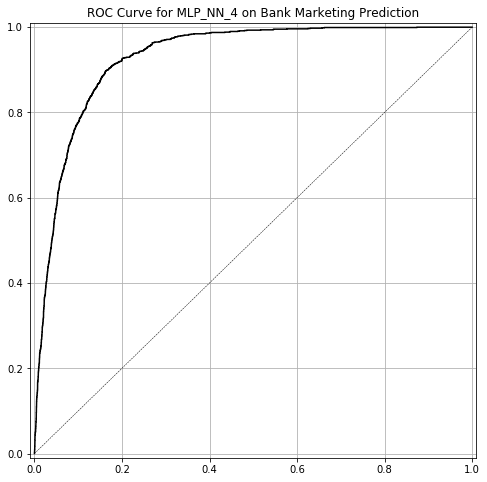

In [54]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_mlp)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_mlp[:,1])))
print('f1-score is {:.3f}'.format(f1_score(y_test,y_pred_mlp)))
print(classification_report(y_test, y_pred_mlp))
plot_roc(y_test, y_pred_prob_mlp[:, 1], 'MLP_NN_4')

In [55]:
print("Layer 1: ", MLP_model_4.coefs_[0].shape)
print("Layer 2: ", MLP_model_4.coefs_[1].shape)
print("Layer 3: ", MLP_model_4.coefs_[2].shape)
print("Output Layer: ", MLP_model_4.coefs_[3].shape)

Layer 1:  (42, 8)
Layer 2:  (8, 8)
Layer 3:  (8, 4)
Output Layer:  (4, 1)


In [56]:
# The total number of trainable parameters for MLP_model_4
lay1 = 42*8 + 8
lay2 = 8*8 + 8
lay3 = 8*4 + 4
lay4 = 4*1 + 1
print("Total trainable parameters for MLP_model_4: ", lay1 + lay2 + lay3 + lay4)

Total trainable parameters for MLP_model_4:  457


In [57]:
MLP_model_5 = MLPClassifier(hidden_layer_sizes=(8,4,2), activation='relu', max_iter=200, random_state = 1234)
MLP_model_5.fit(X_train_sc, y_train)
y_pred_mlp = MLP_model_5.predict(X_test_sc)
y_pred_prob_mlp = MLP_model_5.predict_proba(X_test_sc)

accuracy is 0.909
roc-auc is 0.934
f1-score is 0.524
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10012
           1       0.65      0.44      0.52      1291

    accuracy                           0.91     11303
   macro avg       0.79      0.70      0.74     11303
weighted avg       0.90      0.91      0.90     11303



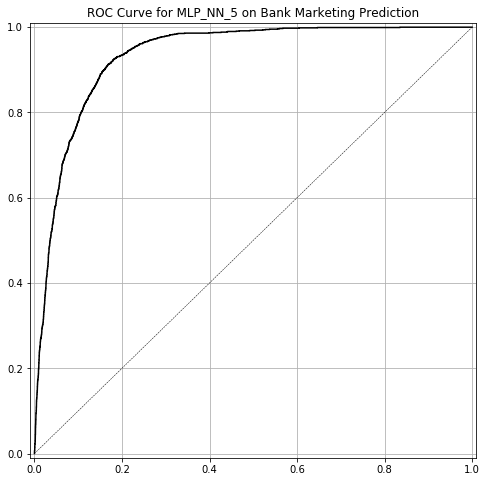

In [58]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_mlp)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_mlp[:,1])))
print('f1-score is {:.3f}'.format(f1_score(y_test,y_pred_mlp)))
print(classification_report(y_test, y_pred_mlp))
plot_roc(y_test, y_pred_prob_mlp[:, 1], 'MLP_NN_5')

In [59]:
print("Layer 1: ", MLP_model_5.coefs_[0].shape)
print("Layer 2: ", MLP_model_5.coefs_[1].shape)
print("Layer 3: ", MLP_model_5.coefs_[2].shape)
print("Output Layer: ", MLP_model_5.coefs_[3].shape)

Layer 1:  (42, 8)
Layer 2:  (8, 4)
Layer 3:  (4, 2)
Output Layer:  (2, 1)


In [60]:
# The total number of trainable parameters for MLP_model_5
lay1 = 42*8 + 8
lay2 = 8*4 + 4
lay3 = 4*2 + 2
lay4 = 2*1 + 1
print("Total trainable parameters for MLP_model_5: ", lay1 + lay2 + lay3 + lay4)

Total trainable parameters for MLP_model_5:  393


The accuracy, ROC-AUC and f1 scores for these five different NN models are summarized as following:

In [61]:
MLP_dict = {'Model':['Model_1', 'Model_2', 'Model_3', 'Model_4', 'Model_5'],
            'Neural nodes in layer1':[16,150,64,8,8],
            'Neural nodes in layer2':[16,100,16,8,4],
            'Neural nodes in layer3':[4,50,4,4,2],
            'Trainable parameters':[1033,26651,3865,457,393],
            'f1-score (for \'yes\')':[0.59,0.50,0.51,0.58,0.52],
            'Accuracy':[0.907,0.880,0.902,0.908,0.909],
            'ROC-AUC-score':[0.929,0.869,0.907,0.930,0.934]}
MLP_model_sum = pd.DataFrame(MLP_dict)
MLP_model_sum

,Model,Neural nodes in layer1,Neural nodes in layer2,Neural nodes in layer3,Trainable parameters,f1-score (for 'yes'),Accuracy,ROC-AUC-score
0,Model_1,16,16,4,1033,0.59,0.907,0.929
1,Model_2,150,100,50,26651,0.50,0.880,0.869
2,Model_3,64,16,4,3865,0.51,0.902,0.907
3,Model_4,8,8,4,457,0.58,0.908,0.930
4,Model_5,8,4,2,393,0.52,0.909,0.934


According to these testing results, Model_1 (layers = (16, 16, 4)) and Model_4 (layers = (8, 8, 4)) performed the best based on their accuracy, ROC-AUC and f1 scores in comparison to other neural network models. The numbers of trainable parameters for these two NN models are 1033 and 457, respectively. Interestingly, more complicated NN models (e.g., Model_2 and Model_3) actually performed worse in classification prediction when compared to other three simpler NN models. Particularly, Model_2 (layers = (150, 100, 50)), the most complicated NN model with 26651 trainable parameters, was the one performing worst.

### Deep learning using tensorflow.keras:

The required deep learning packages for **tensorflow.keras** were imported into the Jupyter Notebook.

In [62]:
# Import required keras packages for building neural network models
from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Using TensorFlow backend.


#### Neural network models with one hidden neural layer:

To understand how many neural nodes are needed for the modeling of the neural network with one hidden layer, a range of neural node numbers (4, 8, 16, 32, 64) were tested. Based on **MLPClassifier** modeling results, **Relu** and **Adam** were used in these tested NN models.

In [63]:
acc = []
auc = []
f1 = []

for n in [4, 8, 16, 32, 64]:
    model_ann = Sequential()
    model_ann.add(Dense(n, input_shape=(42,), activation="relu"))
    model_ann.add(Dense(1, activation="sigmoid"))
    model_ann.compile(optimizer=Adam(learning_rate = .0002), loss="binary_crossentropy", metrics=["accuracy"])
    model_ann.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=70, verbose=0)
    y_pred_class_ann = model_ann.predict_classes(X_test_sc)
    y_pred_prob_ann = model_ann.predict(X_test_sc)
    acc.append(round(accuracy_score(y_test,y_pred_class_ann),3))
    auc.append(round(roc_auc_score(y_test,y_pred_prob_ann),3))
    f1.append(round(f1_score(y_test,y_pred_class_ann), 3))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Two more numbers of neural nodes were tested to see whether they can improve the prediction performance of the neural network model.

In [66]:
# Test two more neural nodes
for n in [80, 96]:
    model_ann = Sequential()
    model_ann.add(Dense(n, input_shape=(42,), activation="relu"))
    model_ann.add(Dense(1, activation="sigmoid"))
    model_ann.compile(optimizer=Adam(learning_rate = .0002), loss="binary_crossentropy", metrics=["accuracy"])
    model_ann.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=70, verbose=0)
    y_pred_class_ann = model_ann.predict_classes(X_test_sc)
    y_pred_prob_ann = model_ann.predict(X_test_sc)
    acc.append(round(accuracy_score(y_test,y_pred_class_ann),3))
    auc.append(round(roc_auc_score(y_test,y_pred_prob_ann),3))
    f1.append(round(f1_score(y_test,y_pred_class_ann), 3))

Accuracy, ROC-AUC and f1 scores that were used to evaluate the prediction performance of these seven NN models were summarized as a table shown below.

In [70]:
para_n = list((42*n)+n+n+1 for n in [4, 8, 16, 32, 64, 80, 96])
model_ann_df = pd.DataFrame({'Neural nodes':[4, 8, 16, 32, 64, 80, 96],
                             'Trainable parameters':para_n,
                             'f1-score':f1,
                             'Accuracy':acc,
                             'ROC-AUC-score':auc})
model_ann_df

,Neural nodes,Trainable parameters,f1-score,Accuracy,ROC-AUC-score
0,4,177,0.532,0.908,0.919
1,8,353,0.517,0.909,0.922
2,16,705,0.517,0.909,0.926
3,32,1409,0.539,0.912,0.932
4,64,2817,0.568,0.914,0.932
5,80,3521,0.525,0.911,0.933
6,96,4225,0.549,0.912,0.933


Based on the test results summarized above, the prediction performance of neural network models reaches the plateau when the neural nodes are 32 or above.

#### Neural network models with multiple hidden neural layers:

To evaluate the effect of multiple hidden neural layers on the prediction performance of neural network models, NN models with two or three hidden layers were tested.

**Relu** was used as the activation function and three optimizers **(SGD, RMSprop and Adam)** were tested in neural network modeling.

In [72]:
# Define the Model 1
# Input size is 42-dimensional
# Two hidden layers, 16 hidden nodes for each layer, relu activation
# Final layer has just one node with a sigmoid activation (standard for binary classification)

model_1 = Sequential()
model_1.add(Dense(16, input_shape=(42,), activation="relu"))
model_1.add(Dense(16,  activation="relu"))
model_1.add(Dense(1, activation="sigmoid"))

model_1.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 16)                688       
_________________________________________________________________
dense_19 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 17        
Total params: 977
Trainable params: 977
Non-trainable params: 0
_________________________________________________________________


In [73]:
# Fit(Train) the Model_1 using the SGD optimizer
# Compile the model with Optimizer, Loss Function and Metrics

model_1.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_1.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=100)

Train on 33908 samples, validate on 11303 samples
Epoch 1/100
33908/33908 [==============================] - 2s 58us/step - loss: 0.3812 - accuracy: 0.8821 - val_loss: 0.3414 - val_accuracy: 0.8858
Epoch 2/100
33908/33908 [==============================] - 2s 51us/step - loss: 0.3443 - accuracy: 0.8821 - val_loss: 0.3356 - val_accuracy: 0.8858
Epoch 3/100
33908/33908 [==============================] - 2s 49us/step - loss: 0.3396 - accuracy: 0.8821 - val_loss: 0.3314 - val_accuracy: 0.8858
Epoch 4/100
33908/33908 [==============================] - 2s 47us/step - loss: 0.3359 - accuracy: 0.8821 - val_loss: 0.3279 - val_accuracy: 0.8858
Epoch 5/100
33908/33908 [==============================] - 2s 47us/step - loss: 0.3329 - accuracy: 0.8821 - val_loss: 0.3250 - val_accuracy: 0.8858
Epoch 6/100
33908/33908 [==============================] - 2s 47us/step - loss: 0.3303 - accuracy: 0.8821 - val_loss: 0.3226 - val_accuracy: 0.8858
Epoch 7/100
33908/33908 [==============================] - 2s 

Epoch 56/100
33908/33908 [==============================] - 2s 55us/step - loss: 0.2545 - accuracy: 0.8945 - val_loss: 0.2466 - val_accuracy: 0.8973
Epoch 57/100
33908/33908 [==============================] - 2s 51us/step - loss: 0.2528 - accuracy: 0.8949 - val_loss: 0.2445 - val_accuracy: 0.8975
Epoch 58/100
33908/33908 [==============================] - 2s 49us/step - loss: 0.2510 - accuracy: 0.8952 - val_loss: 0.2428 - val_accuracy: 0.8974
Epoch 59/100
33908/33908 [==============================] - 2s 52us/step - loss: 0.2493 - accuracy: 0.8955 - val_loss: 0.2413 - val_accuracy: 0.8984
Epoch 60/100
33908/33908 [==============================] - 2s 47us/step - loss: 0.2478 - accuracy: 0.8955 - val_loss: 0.2394 - val_accuracy: 0.8985
Epoch 61/100
33908/33908 [==============================] - 2s 48us/step - loss: 0.2461 - accuracy: 0.8963 - val_loss: 0.2383 - val_accuracy: 0.8990
Epoch 62/100
33908/33908 [==============================] - 2s 49us/step - loss: 0.2446 - accuracy: 0.8965

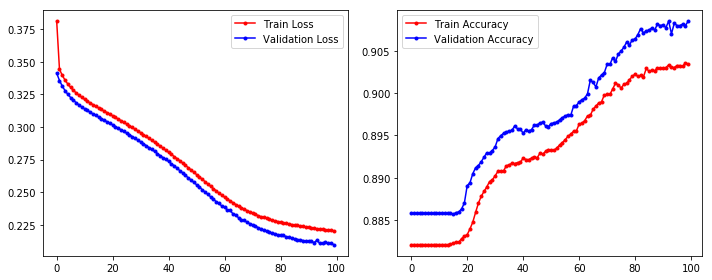

In [74]:
# The graph views of changes in loss and accuracy scores during the training of neural network model 1 (100 epochs)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax1.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax2.plot(run_hist_1.history["accuracy"],'r', marker='.', label="Train Accuracy")
ax2.plot(run_hist_1.history["val_accuracy"],'b', marker='.', label="Validation Accuracy")
ax1.legend()
ax2.legend()
fig.tight_layout();

In [75]:
#  A hard decision and a probabilitistic score were generated as two kinds of predictions of Model_1.

y_pred_class_nn_1 = model_1.predict_classes(X_test_sc)
y_pred_prob_nn_1 = model_1.predict(X_test_sc)

accuracy is 0.909
roc-auc is 0.923
f1-score is 0.535
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10012
           1       0.64      0.46      0.54      1291

    accuracy                           0.91     11303
   macro avg       0.79      0.71      0.74     11303
weighted avg       0.90      0.91      0.90     11303



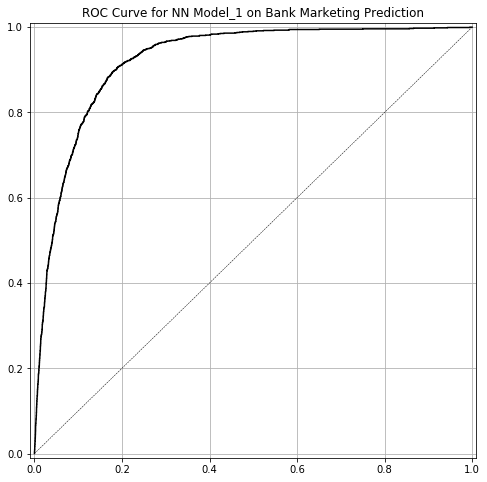

In [76]:
# Print NN model_1 performance and plot the roc curve
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))
print('f1-score is {:.3f}'.format(f1_score(y_test,y_pred_class_nn_1)))
print(classification_report(y_test, y_pred_class_nn_1))
plot_roc(y_test, y_pred_prob_nn_1, 'NN Model_1')

In [77]:
# Train Model_1 with 50 more epoches
run_hist_1b = model_1.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=50)

Train on 33908 samples, validate on 11303 samples
Epoch 1/50
33908/33908 [==============================] - 2s 53us/step - loss: 0.2203 - accuracy: 0.9028 - val_loss: 0.2099 - val_accuracy: 0.9074
Epoch 2/50
33908/33908 [==============================] - 2s 49us/step - loss: 0.2200 - accuracy: 0.9032 - val_loss: 0.2093 - val_accuracy: 0.9079
Epoch 3/50
33908/33908 [==============================] - 2s 50us/step - loss: 0.2198 - accuracy: 0.9039 - val_loss: 0.2095 - val_accuracy: 0.9079
Epoch 4/50
33908/33908 [==============================] - 2s 47us/step - loss: 0.2195 - accuracy: 0.9037 - val_loss: 0.2089 - val_accuracy: 0.9083
Epoch 5/50
33908/33908 [==============================] - 2s 48us/step - loss: 0.2194 - accuracy: 0.9036 - val_loss: 0.2090 - val_accuracy: 0.9079
Epoch 6/50
33908/33908 [==============================] - 2s 47us/step - loss: 0.2191 - accuracy: 0.9034 - val_loss: 0.2090 - val_accuracy: 0.9090
Epoch 7/50
33908/33908 [==============================] - 2s 49us/st

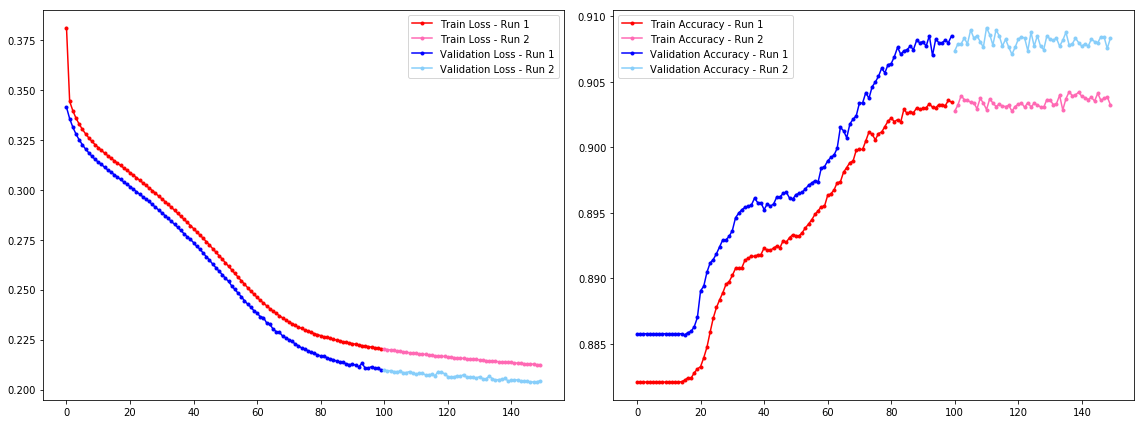

In [78]:
# The graph views of changes in loss and accuracy scores during the training of neural network model 1 (total 150 epochs)
n = len(run_hist_1.history["loss"])
m = len(run_hist_1b.history['loss'])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(range(n), run_hist_1.history["loss"],'r', marker='.', label="Train Loss - Run 1")
ax1.plot(range(n, n+m), run_hist_1b.history["loss"], 'hotpink', marker='.', label="Train Loss - Run 2")

ax1.plot(range(n), run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss - Run 1")
ax1.plot(range(n, n+m), run_hist_1b.history["val_loss"], 'LightSkyBlue', marker='.',  label="Validation Loss - Run 2")

ax2.plot(range(n), run_hist_1.history["accuracy"],'r', marker='.', label="Train Accuracy - Run 1")
ax2.plot(range(n, n+m), run_hist_1b.history["accuracy"], 'hotpink', marker='.', label="Train Accuracy - Run 2")

ax2.plot(range(n), run_hist_1.history["val_accuracy"],'b', marker='.', label="Validation Accuracy - Run 1")
ax2.plot(range(n, n+m), run_hist_1b.history["val_accuracy"], 'LightSkyBlue', marker='.',  label="Validation Accuracy - Run 2")

ax1.legend()
ax2.legend()
fig.tight_layout();

accuracy is 0.908
roc-auc is 0.927
f1-score is 0.553
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10012
           1       0.62      0.50      0.55      1291

    accuracy                           0.91     11303
   macro avg       0.78      0.73      0.75     11303
weighted avg       0.90      0.91      0.90     11303



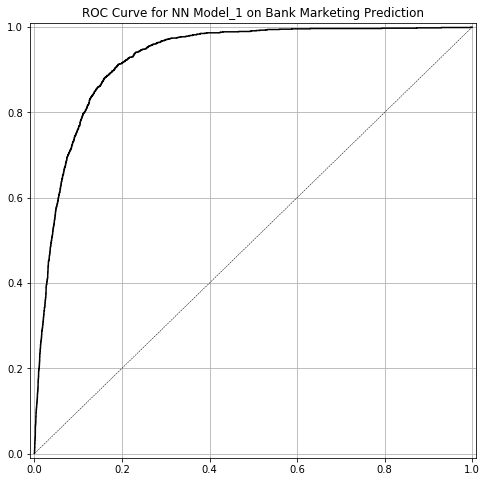

In [79]:
# Print NN model_1 performance and plot the roc curve
y_pred_class_nn_1 = model_1.predict_classes(X_test_sc)
y_pred_prob_nn_1 = model_1.predict(X_test_sc)

# Print NN model_1 performance and plot the roc curve
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))
print('f1-score is {:.3f}'.format(f1_score(y_test,y_pred_class_nn_1)))
print(classification_report(y_test, y_pred_class_nn_1))
plot_roc(y_test, y_pred_prob_nn_1, 'NN Model_1')

The learning of Model_1 reaches the plateau after training over 80 epoches.

In [80]:
# Define the Model 2
# Input size is 42-dimensional
# 2 hidden layers, 16 hidden nodes for each layer, relu as activation
# Final layer has just one node with a sigmoid activation (standard for binary classification)

model_2 = Sequential()
model_2.add(Dense(16, input_shape=(42,), activation="relu"))
model_2.add(Dense(16,  activation="relu"))
model_2.add(Dense(1, activation="sigmoid"))

# Train the NN model_2 for 100 epochs using RMSprop as the optimizer
model_2.compile(optimizer=RMSprop(lr=0.0005, decay=1e-6), loss="binary_crossentropy", metrics=["accuracy"])
run_hist_2 = model_2.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=100)

Train on 33908 samples, validate on 11303 samples
Epoch 1/100
33908/33908 [==============================] - 2s 67us/step - loss: 0.3412 - accuracy: 0.8781 - val_loss: 0.2928 - val_accuracy: 0.8922
Epoch 2/100
33908/33908 [==============================] - 2s 51us/step - loss: 0.2895 - accuracy: 0.8911 - val_loss: 0.2698 - val_accuracy: 0.8974
Epoch 3/100
33908/33908 [==============================] - 2s 51us/step - loss: 0.2708 - accuracy: 0.8942 - val_loss: 0.2528 - val_accuracy: 0.9000
Epoch 4/100
33908/33908 [==============================] - 2s 52us/step - loss: 0.2575 - accuracy: 0.8971 - val_loss: 0.2403 - val_accuracy: 0.9024
Epoch 5/100
33908/33908 [==============================] - 2s 54us/step - loss: 0.2483 - accuracy: 0.8983 - val_loss: 0.2319 - val_accuracy: 0.9050
Epoch 6/100
33908/33908 [==============================] - 2s 52us/step - loss: 0.2431 - accuracy: 0.8998 - val_loss: 0.2288 - val_accuracy: 0.9052
Epoch 7/100
33908/33908 [==============================] - 2s 

Epoch 56/100
33908/33908 [==============================] - 2s 50us/step - loss: 0.2155 - accuracy: 0.9060 - val_loss: 0.2173 - val_accuracy: 0.9050
Epoch 57/100
33908/33908 [==============================] - 2s 50us/step - loss: 0.2153 - accuracy: 0.9063 - val_loss: 0.2177 - val_accuracy: 0.9048
Epoch 58/100
33908/33908 [==============================] - 2s 51us/step - loss: 0.2147 - accuracy: 0.9064 - val_loss: 0.2170 - val_accuracy: 0.9037
Epoch 59/100
33908/33908 [==============================] - 2s 50us/step - loss: 0.2149 - accuracy: 0.9066 - val_loss: 0.2161 - val_accuracy: 0.9045
Epoch 60/100
33908/33908 [==============================] - 2s 50us/step - loss: 0.2145 - accuracy: 0.9064 - val_loss: 0.2180 - val_accuracy: 0.9039
Epoch 61/100
33908/33908 [==============================] - 2s 51us/step - loss: 0.2149 - accuracy: 0.9068 - val_loss: 0.2180 - val_accuracy: 0.9043
Epoch 62/100
33908/33908 [==============================] - 2s 51us/step - loss: 0.2144 - accuracy: 0.9073

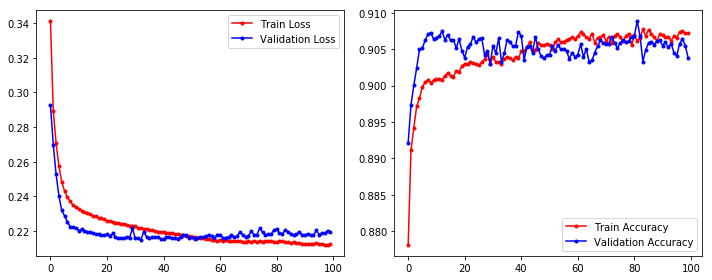

In [81]:
# The graph views of changes in loss and accuracy scores during the training of neural network model 2 (100 epochs)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.plot(run_hist_2.history["loss"],'r', marker='.', label="Train Loss")
ax1.plot(run_hist_2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax2.plot(run_hist_2.history["accuracy"],'r', marker='.', label="Train Accuracy")
ax2.plot(run_hist_2.history["val_accuracy"],'b', marker='.', label="Validation Accuracy")
ax1.legend()
ax2.legend()
fig.tight_layout();

accuracy is 0.904
roc-auc is 0.917
f1-score is 0.471
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     10012
           1       0.63      0.37      0.47      1291

    accuracy                           0.90     11303
   macro avg       0.78      0.67      0.71     11303
weighted avg       0.89      0.90      0.89     11303



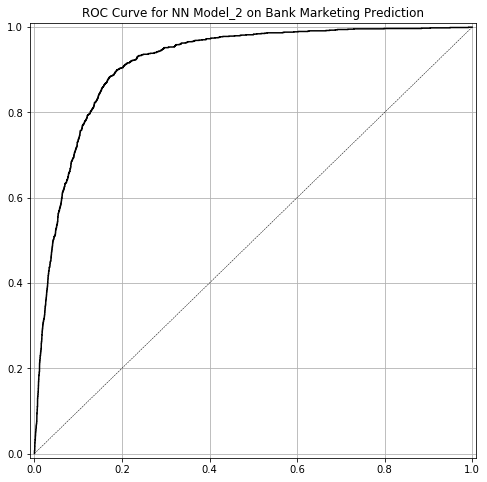

In [82]:
# Print NN model_2 performance and plot the roc curve
y_pred_class_nn_2 = model_2.predict_classes(X_test_sc)
y_pred_prob_nn_2 = model_2.predict(X_test_sc)

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_2)))
print('f1-score is {:.3f}'.format(f1_score(y_test,y_pred_class_nn_2)))
print(classification_report(y_test, y_pred_class_nn_2))
plot_roc(y_test, y_pred_prob_nn_2, 'NN Model_2')

In [83]:
# Define the Model 3
# Input size is 42-dimensional
# 2 hidden layers, 16 hidden nodes for each layer, relu as activation
# Final layer has just one node with a sigmoid activation (standard for binary classification)

model_3 = Sequential()
model_3.add(Dense(16, input_shape=(42,), activation="relu"))
model_3.add(Dense(16,  activation="relu"))
model_3.add(Dense(1, activation="sigmoid"))

# Train the NN model_3 for 100 epochs using Adam as the optimizer
model_3.compile(optimizer=Adam(learning_rate = .0002), loss="binary_crossentropy", metrics=["accuracy"])
run_hist_3 = model_3.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=100)

Train on 33908 samples, validate on 11303 samples
Epoch 1/100
33908/33908 [==============================] - 2s 66us/step - loss: 0.3713 - accuracy: 0.8783 - val_loss: 0.3203 - val_accuracy: 0.8866
Epoch 2/100
33908/33908 [==============================] - 2s 54us/step - loss: 0.3159 - accuracy: 0.8870 - val_loss: 0.3016 - val_accuracy: 0.8933
Epoch 3/100
33908/33908 [==============================] - 2s 54us/step - loss: 0.3009 - accuracy: 0.8909 - val_loss: 0.2881 - val_accuracy: 0.8936
Epoch 4/100
33908/33908 [==============================] - 2s 54us/step - loss: 0.2881 - accuracy: 0.8924 - val_loss: 0.2755 - val_accuracy: 0.8937
Epoch 5/100
33908/33908 [==============================] - 2s 53us/step - loss: 0.2749 - accuracy: 0.8923 - val_loss: 0.2618 - val_accuracy: 0.8955
Epoch 6/100
33908/33908 [==============================] - 2s 55us/step - loss: 0.2623 - accuracy: 0.8942 - val_loss: 0.2489 - val_accuracy: 0.8975
Epoch 7/100
33908/33908 [==============================] - 2s 

Epoch 56/100
33908/33908 [==============================] - 2s 54us/step - loss: 0.2057 - accuracy: 0.9069 - val_loss: 0.2001 - val_accuracy: 0.9090
Epoch 57/100
33908/33908 [==============================] - 2s 54us/step - loss: 0.2053 - accuracy: 0.9069 - val_loss: 0.2007 - val_accuracy: 0.9087
Epoch 58/100
33908/33908 [==============================] - 2s 54us/step - loss: 0.2052 - accuracy: 0.9075 - val_loss: 0.2003 - val_accuracy: 0.9096
Epoch 59/100
33908/33908 [==============================] - 2s 55us/step - loss: 0.2048 - accuracy: 0.9079 - val_loss: 0.2001 - val_accuracy: 0.9084
Epoch 60/100
33908/33908 [==============================] - 2s 54us/step - loss: 0.2046 - accuracy: 0.9075 - val_loss: 0.1995 - val_accuracy: 0.9086
Epoch 61/100
33908/33908 [==============================] - 2s 54us/step - loss: 0.2043 - accuracy: 0.9074 - val_loss: 0.1995 - val_accuracy: 0.9085
Epoch 62/100
33908/33908 [==============================] - 2s 54us/step - loss: 0.2039 - accuracy: 0.9078

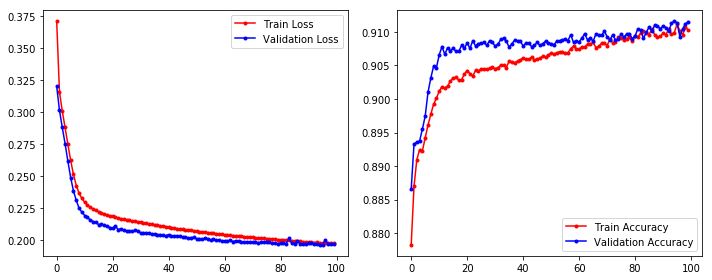

In [84]:
# The graph views of changes in loss and accuracy scores during the training of neural network model 3 (100 epochs)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.plot(run_hist_3.history["loss"],'r', marker='.', label="Train Loss")
ax1.plot(run_hist_3.history["val_loss"],'b', marker='.', label="Validation Loss")
ax2.plot(run_hist_3.history["accuracy"],'r', marker='.', label="Train Accuracy")
ax2.plot(run_hist_3.history["val_accuracy"],'b', marker='.', label="Validation Accuracy")
ax1.legend()
ax2.legend()
fig.tight_layout();

accuracy is 0.912
roc-auc is 0.932
f1-score is 0.549
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10012
           1       0.66      0.47      0.55      1291

    accuracy                           0.91     11303
   macro avg       0.80      0.72      0.75     11303
weighted avg       0.90      0.91      0.91     11303



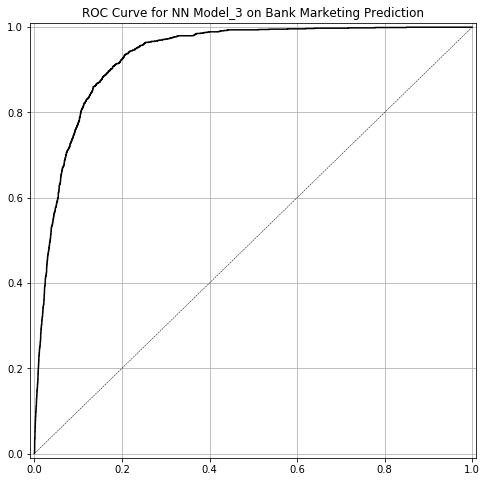

In [85]:
# Print NN model_3 performance and plot the roc curve
y_pred_class_nn_3 = model_3.predict_classes(X_test_sc)
y_pred_prob_nn_3 = model_3.predict(X_test_sc)

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_3)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_3)))
print('f1-score is {:.3f}'.format(f1_score(y_test,y_pred_class_nn_3)))
print(classification_report(y_test, y_pred_class_nn_3))
plot_roc(y_test, y_pred_prob_nn_3, 'NN Model_3')

Based on prediction resuts from Model_1, Model_2 and Model_3, the **Adam** optimizer is the best, **SGD** is the next and **RMSprop** is the last for the neural network modeling prediction. As **Adam** is the best optimizer in the testing, it was in the following neural network models.

In [86]:
# Define the Model 4
# Input size is 42-dimensional
# 2 hidden layers, 32 hidden nodes for each layer, relu as activation
# Final layer has just one node with a sigmoid activation (standard for binary classification)

model_4 = Sequential()
model_4.add(Dense(32, input_shape=(42,), activation="relu"))
model_4.add(Dense(32,  activation="relu"))
model_4.add(Dense(1, activation="sigmoid"))

model_4.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 32)                1376      
_________________________________________________________________
dense_28 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 33        
Total params: 2,465
Trainable params: 2,465
Non-trainable params: 0
_________________________________________________________________


In [87]:
# Train the NN model_4 for 100 epochs using Adam as the optimizer
model_4.compile(optimizer=Adam(learning_rate = .0002), loss="binary_crossentropy", metrics=["accuracy"])
run_hist_4 = model_4.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=100)

Train on 33908 samples, validate on 11303 samples
Epoch 1/100
33908/33908 [==============================] - 2s 69us/step - loss: 0.3632 - accuracy: 0.8586 - val_loss: 0.3013 - val_accuracy: 0.8912
Epoch 2/100
33908/33908 [==============================] - 2s 57us/step - loss: 0.2967 - accuracy: 0.8916 - val_loss: 0.2788 - val_accuracy: 0.8945
Epoch 3/100
33908/33908 [==============================] - 2s 58us/step - loss: 0.2759 - accuracy: 0.8936 - val_loss: 0.2599 - val_accuracy: 0.8968
Epoch 4/100
33908/33908 [==============================] - 2s 58us/step - loss: 0.2594 - accuracy: 0.8954 - val_loss: 0.2439 - val_accuracy: 0.8994
Epoch 5/100
33908/33908 [==============================] - 2s 58us/step - loss: 0.2459 - accuracy: 0.8983 - val_loss: 0.2330 - val_accuracy: 0.9029
Epoch 6/100
33908/33908 [==============================] - 2s 59us/step - loss: 0.2372 - accuracy: 0.9007 - val_loss: 0.2255 - val_accuracy: 0.9046
Epoch 7/100
33908/33908 [==============================] - 2s 

Epoch 56/100
33908/33908 [==============================] - 2s 56us/step - loss: 0.1930 - accuracy: 0.9117 - val_loss: 0.2014 - val_accuracy: 0.9094
Epoch 57/100
33908/33908 [==============================] - 2s 55us/step - loss: 0.1927 - accuracy: 0.9122 - val_loss: 0.2014 - val_accuracy: 0.9092
Epoch 58/100
33908/33908 [==============================] - 2s 55us/step - loss: 0.1925 - accuracy: 0.9117 - val_loss: 0.2019 - val_accuracy: 0.9094
Epoch 59/100
33908/33908 [==============================] - 2s 55us/step - loss: 0.1924 - accuracy: 0.9114 - val_loss: 0.2014 - val_accuracy: 0.9083
Epoch 60/100
33908/33908 [==============================] - 2s 55us/step - loss: 0.1922 - accuracy: 0.9113 - val_loss: 0.2008 - val_accuracy: 0.9087
Epoch 61/100
33908/33908 [==============================] - 2s 55us/step - loss: 0.1919 - accuracy: 0.9119 - val_loss: 0.2013 - val_accuracy: 0.9091
Epoch 62/100
33908/33908 [==============================] - 2s 55us/step - loss: 0.1914 - accuracy: 0.9126

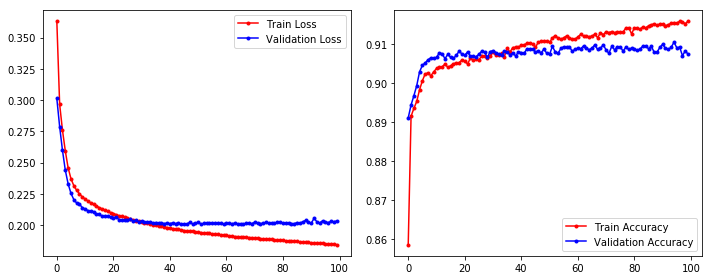

In [88]:
# The graph views of changes in loss and accuracy scores during the training of neural network model 4 (100 epochs)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.plot(run_hist_4.history["loss"],'r', marker='.', label="Train Loss")
ax1.plot(run_hist_4.history["val_loss"],'b', marker='.', label="Validation Loss")
ax2.plot(run_hist_4.history["accuracy"],'r', marker='.', label="Train Accuracy")
ax2.plot(run_hist_4.history["val_accuracy"],'b', marker='.', label="Validation Accuracy")
ax1.legend()
ax2.legend()
fig.tight_layout();

accuracy is 0.907
roc-auc is 0.929
f1-score is 0.572
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     10012
           1       0.61      0.54      0.57      1291

    accuracy                           0.91     11303
   macro avg       0.77      0.75      0.76     11303
weighted avg       0.90      0.91      0.91     11303



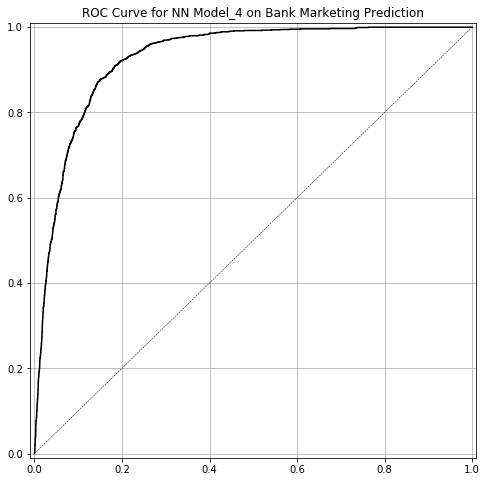

In [89]:
# Print NN model_4 performance and plot the roc curve
y_pred_class_nn_4 = model_4.predict_classes(X_test_sc)
y_pred_prob_nn_4 = model_4.predict(X_test_sc)

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_4)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_4)))
print('f1-score is {:.3f}'.format(f1_score(y_test,y_pred_class_nn_4)))
print(classification_report(y_test, y_pred_class_nn_4))
plot_roc(y_test, y_pred_prob_nn_4, 'NN Model_4')

In [90]:
# Define the Model 5
# Input size is 42-dimensional
# 2 hidden layers, 64 hidden nodes for each layer, relu as activation
# Final layer has just one node with a sigmoid activation (standard for binary classification)

model_5 = Sequential()
model_5.add(Dense(64, input_shape=(42,), activation="relu"))
model_5.add(Dense(64,  activation="relu"))
model_5.add(Dense(1, activation="sigmoid"))

model_5.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 64)                2752      
_________________________________________________________________
dense_31 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 65        
Total params: 6,977
Trainable params: 6,977
Non-trainable params: 0
_________________________________________________________________


In [91]:
# Train NN model_5 for 50 epochs using Adam as the optimizer
model_5.compile(optimizer=Adam(learning_rate = .0002), loss="binary_crossentropy", metrics=["accuracy"])
run_hist_5 = model_5.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=50)

Train on 33908 samples, validate on 11303 samples
Epoch 1/50
33908/33908 [==============================] - 3s 93us/step - loss: 0.3313 - accuracy: 0.8840 - val_loss: 0.2892 - val_accuracy: 0.8948
Epoch 2/50
33908/33908 [==============================] - 3s 79us/step - loss: 0.2837 - accuracy: 0.8921 - val_loss: 0.2630 - val_accuracy: 0.8975
Epoch 3/50
33908/33908 [==============================] - 3s 87us/step - loss: 0.2595 - accuracy: 0.8953 - val_loss: 0.2401 - val_accuracy: 0.9023
Epoch 4/50
33908/33908 [==============================] - 3s 86us/step - loss: 0.2404 - accuracy: 0.8990 - val_loss: 0.2244 - val_accuracy: 0.9048
Epoch 5/50
33908/33908 [==============================] - 4s 132us/step - loss: 0.2296 - accuracy: 0.9021 - val_loss: 0.2188 - val_accuracy: 0.9059
Epoch 6/50
33908/33908 [==============================] - 3s 91us/step - loss: 0.2243 - accuracy: 0.9032 - val_loss: 0.2150 - val_accuracy: 0.9072
Epoch 7/50
33908/33908 [==============================] - 4s 113us/

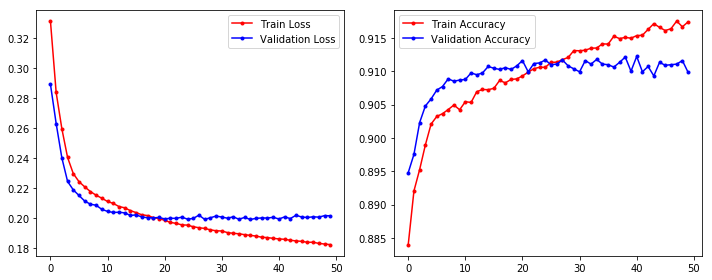

In [92]:
# The graph views of changes in loss and accuracy scores during the training of neural network model 5 (50 epochs)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.plot(run_hist_5.history["loss"],'r', marker='.', label="Train Loss")
ax1.plot(run_hist_5.history["val_loss"],'b', marker='.', label="Validation Loss")
ax2.plot(run_hist_5.history["accuracy"],'r', marker='.', label="Train Accuracy")
ax2.plot(run_hist_5.history["val_accuracy"],'b', marker='.', label="Validation Accuracy")
ax1.legend()
ax2.legend()
fig.tight_layout();

accuracy is 0.910
roc-auc is 0.929
f1-score is 0.576
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10012
           1       0.62      0.54      0.58      1291

    accuracy                           0.91     11303
   macro avg       0.78      0.75      0.76     11303
weighted avg       0.90      0.91      0.91     11303



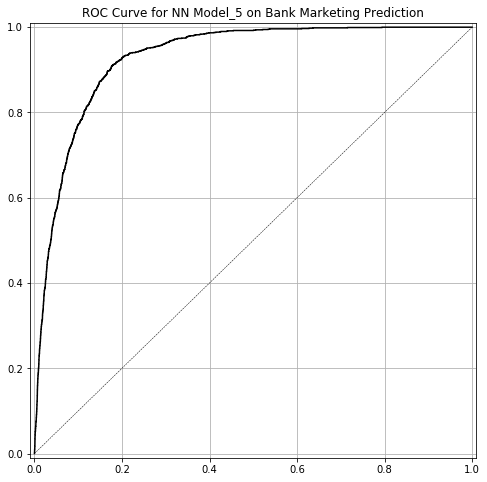

In [93]:
# Print NN model_5 performance and plot the roc curve
y_pred_class_nn_5 = model_5.predict_classes(X_test_sc)
y_pred_prob_nn_5 = model_5.predict(X_test_sc)

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_5)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_5)))
print('f1-score is {:.3f}'.format(f1_score(y_test,y_pred_class_nn_5)))
print(classification_report(y_test, y_pred_class_nn_5))
plot_roc(y_test, y_pred_prob_nn_5, 'NN Model_5')

In [94]:
# Define the Model 6
# Input size is 42-dimensional
# 3 hidden layers, 8 hidden nodes for each one of first two layers and 4 hidden nodes in the third layer, RELU activation
# Final layer has just one node with a sigmoid activation (standard for binary classification)

model_6 = Sequential()
model_6.add(Dense(8, input_shape=(42,), activation="relu"))
model_6.add(Dense(8, activation="relu"))
model_6.add(Dense(4, activation="relu"))
model_6.add(Dense(1, activation="sigmoid"))

model_6.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 8)                 344       
_________________________________________________________________
dense_34 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_35 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 5         
Total params: 457
Trainable params: 457
Non-trainable params: 0
_________________________________________________________________


In [95]:
# Train NN model_6 for 50 epochs using Adam optimizer
model_6.compile(optimizer=Adam(learning_rate = .0002), loss="binary_crossentropy", metrics=["accuracy"])
run_hist_6 = model_6.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=50)

Train on 33908 samples, validate on 11303 samples
Epoch 1/50
33908/33908 [==============================] - 2s 72us/step - loss: 0.4776 - accuracy: 0.8609 - val_loss: 0.3314 - val_accuracy: 0.8858
Epoch 2/50
33908/33908 [==============================] - 2s 57us/step - loss: 0.3316 - accuracy: 0.8821 - val_loss: 0.3181 - val_accuracy: 0.8858
Epoch 3/50
33908/33908 [==============================] - 2s 57us/step - loss: 0.3202 - accuracy: 0.8825 - val_loss: 0.3071 - val_accuracy: 0.8881
Epoch 4/50
33908/33908 [==============================] - 2s 57us/step - loss: 0.3092 - accuracy: 0.8878 - val_loss: 0.2975 - val_accuracy: 0.8946
Epoch 5/50
33908/33908 [==============================] - 2s 59us/step - loss: 0.3008 - accuracy: 0.8919 - val_loss: 0.2900 - val_accuracy: 0.8953
Epoch 6/50
33908/33908 [==============================] - 2s 57us/step - loss: 0.2936 - accuracy: 0.8927 - val_loss: 0.2822 - val_accuracy: 0.8950
Epoch 7/50
33908/33908 [==============================] - 2s 58us/st

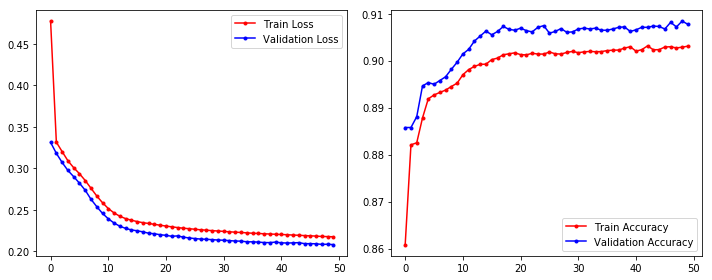

In [96]:
# The graph views of changes in loss and accuracy scores during the training of neural network model 6 (50 epochs) using Adam
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.plot(run_hist_6.history["loss"],'r', marker='.', label="Train Loss")
ax1.plot(run_hist_6.history["val_loss"],'b', marker='.', label="Validation Loss")
ax2.plot(run_hist_6.history["accuracy"],'r', marker='.', label="Train Accuracy")
ax2.plot(run_hist_6.history["val_accuracy"],'b', marker='.', label="Validation Accuracy")
ax1.legend()
ax2.legend()
fig.tight_layout();

accuracy is 0.908
roc-auc is 0.923
f1-score is 0.519
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10012
           1       0.64      0.44      0.52      1291

    accuracy                           0.91     11303
   macro avg       0.79      0.70      0.73     11303
weighted avg       0.90      0.91      0.90     11303



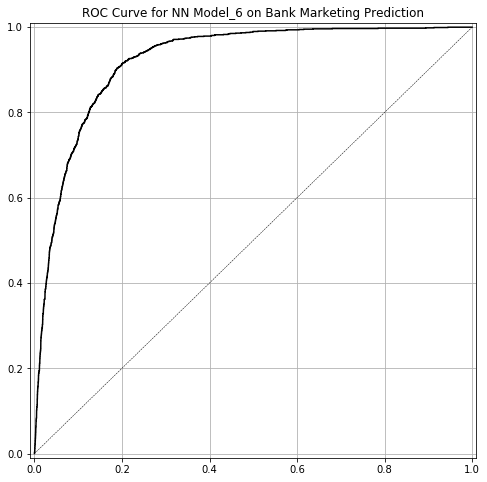

In [97]:
# Print NN model_6 performance and plot the roc curve
y_pred_class_nn_6 = model_6.predict_classes(X_test_sc)
y_pred_prob_nn_6 = model_6.predict(X_test_sc)

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_6)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_6)))
print('f1-score is {:.3f}'.format(f1_score(y_test,y_pred_class_nn_6)))
print(classification_report(y_test,y_pred_class_nn_6))

plot_roc(y_test, y_pred_prob_nn_6, 'NN Model_6')

In [98]:
# Define the Model 7
# Input size is 42-dimensional
# 3 hidden layers, 16 hidden nodes for each one of first two layers and 8 hidden nodes in the third layer, RELU activation
# Final layer has just one node with a sigmoid activation (standard for binary classification)

model_7 = Sequential()
model_7.add(Dense(16, input_shape=(42,), activation="relu"))
model_7.add(Dense(16, activation="relu"))
model_7.add(Dense(8, activation="relu"))
model_7.add(Dense(1, activation="sigmoid"))

model_7.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 16)                688       
_________________________________________________________________
dense_38 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_39 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 9         
Total params: 1,105
Trainable params: 1,105
Non-trainable params: 0
_________________________________________________________________


In [99]:
# Train NN model_7 for 50 epochs using Adam optimizer
model_7.compile(optimizer=Adam(learning_rate = .0002), loss="binary_crossentropy", metrics=["accuracy"])
run_hist_7 = model_7.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=50)

Train on 33908 samples, validate on 11303 samples
Epoch 1/50
33908/33908 [==============================] - 3s 74us/step - loss: 0.3878 - accuracy: 0.8819 - val_loss: 0.3163 - val_accuracy: 0.8858
Epoch 2/50
33908/33908 [==============================] - 2s 59us/step - loss: 0.3164 - accuracy: 0.8821 - val_loss: 0.3009 - val_accuracy: 0.8858
Epoch 3/50
33908/33908 [==============================] - 2s 59us/step - loss: 0.3028 - accuracy: 0.8825 - val_loss: 0.2875 - val_accuracy: 0.8914
Epoch 4/50
33908/33908 [==============================] - 2s 61us/step - loss: 0.2875 - accuracy: 0.8906 - val_loss: 0.2701 - val_accuracy: 0.8969
Epoch 5/50
33908/33908 [==============================] - 2s 59us/step - loss: 0.2703 - accuracy: 0.8919 - val_loss: 0.2534 - val_accuracy: 0.8961
Epoch 6/50
33908/33908 [==============================] - 2s 60us/step - loss: 0.2543 - accuracy: 0.8938 - val_loss: 0.2390 - val_accuracy: 0.8978
Epoch 7/50
33908/33908 [==============================] - 2s 60us/st

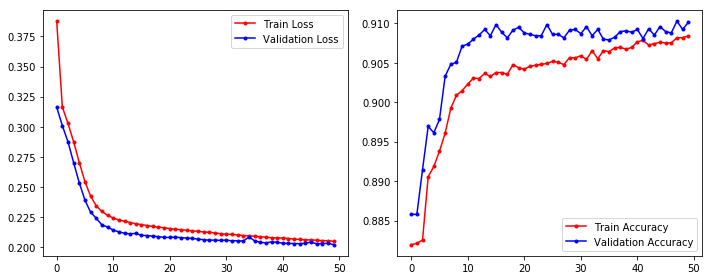

In [100]:
# The graph views of changes in loss and accuracy scores during the training of neural network model 7 (50 epochs) using Adam
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.plot(run_hist_7.history["loss"],'r', marker='.', label="Train Loss")
ax1.plot(run_hist_7.history["val_loss"],'b', marker='.', label="Validation Loss")
ax2.plot(run_hist_7.history["accuracy"],'r', marker='.', label="Train Accuracy")
ax2.plot(run_hist_7.history["val_accuracy"],'b', marker='.', label="Validation Accuracy")
ax1.legend()
ax2.legend()
fig.tight_layout();

accuracy is 0.910
roc-auc is 0.928
f1-score is 0.562
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10012
           1       0.63      0.51      0.56      1291

    accuracy                           0.91     11303
   macro avg       0.79      0.73      0.76     11303
weighted avg       0.90      0.91      0.91     11303



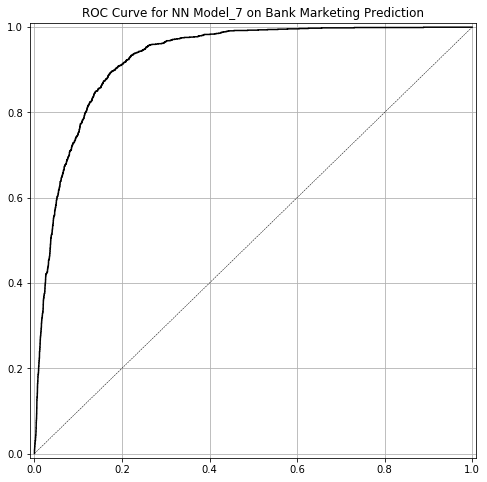

In [101]:
# Print NN model_7 performance and plot the roc curve
y_pred_class_nn_7 = model_7.predict_classes(X_test_sc)
y_pred_prob_nn_7 = model_7.predict(X_test_sc)

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_7)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_7)))
print('f1-score is {:.3f}'.format(f1_score(y_test,y_pred_class_nn_7)))
print(classification_report(y_test,y_pred_class_nn_7))

plot_roc(y_test, y_pred_prob_nn_7, 'NN Model_7')

Accuracy, ROC-AUC and f1 scores that were used to evaluate the prediction performance of these seven neural network models were summarized as a table shown below.

In [102]:
mod = list('Model_' + str(x) for x in range(1,8))
mod

['Model_1', 'Model_2', 'Model_3', 'Model_4', 'Model_5', 'Model_6', 'Model_7']

In [103]:
act = ['relu']*7
act

['relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu']

In [105]:
Keras_dict = {'Model':mod,
              'Neural nodes in layer1':[16, 16, 16, 32, 64, 8, 16],
              'Neural nodes in layer2':[16, 16, 16, 32, 64, 8, 16],
              'Neural nodes in layer3':['na','na','na','na','na', 4, 8],
              'Trainable parameters':[977, 977, 977, 2465, 6977, 457, 1105],
              'Activation':act,
              'Optimizer':['SGD','RMSprop','Adam','Adam','Adam','Adam','Adam'],
              'Accuracy':[0.908, 0.904, 0.912, 0.907, 0.910, 0.908, 0.910],
              'ROC-AUC-score':[0.927, 0.917, 0.932, 0.929, 0.929, 0.923, 0.928],
              'f1-score':[0.553, 0.471, 0.549, 0.572, 0.576, 0.519, 0.562]}
Keras_model_sum = pd.DataFrame(Keras_dict)
Keras_model_sum

,Model,Neural nodes in layer1,Neural nodes in layer2,Neural nodes in layer3,Trainable parameters,Activation,Optimizer,Accuracy,ROC-AUC-score,f1-score
0,Model_1,16,16,na,977,relu,SGD,0.908,0.927,0.553
1,Model_2,16,16,na,977,relu,RMSprop,0.904,0.917,0.471
2,Model_3,16,16,na,977,relu,Adam,0.912,0.932,0.549
3,Model_4,32,32,na,2465,relu,Adam,0.907,0.929,0.572
4,Model_5,64,64,na,6977,relu,Adam,0.910,0.929,0.576
5,Model_6,8,8,4,457,relu,Adam,0.908,0.923,0.519
6,Model_7,16,16,8,1105,relu,Adam,0.910,0.928,0.562


### Conclusion:

According to the prediction performance tests from neural network models built either by **sklearn.neural_network.MLPClassifier** or by **tensorflow.keras**, NN models with one hidden neural layer that has either 32 or more neural nodes with **relu** or **tanh** as the activation function performed better than others in the classification prediction of the bank marketing data when **Adam** was used as an optimizer. For NN models with two or three hidden neural layers tested in this project, overall their performance in the classification prediction of the bank marketing data was not better than that of models with only one hidden layer. When compared to RandomForestClassifier, some neural network models have a superior performance in the f1 score in classification prediction.



### Summary Key Findings and Insights:

1. Among three different activation functions, **relu** and **tanh** performed equivalently in the classification prediction and they were superior to logistic in deep neural network learning.

2. Among three different optimizers, **Adam** performed the best, **SGD** was the next and **RMSprop** was last for the deep learning process of neural network models in the classification prediction of the bank marketing dataset.

3. The number of neural nodes for hidden neural layers needs to be optimized for the different infrastructures of neural network models in order to make sure that NN models can be well trained and perform the best in classification prediction. Setting a higher number of neural nodes won't guarantee that NN models can perform better as too many neural nodes may cause an overfitting problem in training NN models, which may lead to a poor performance in classification prediction.

4. In addition to accuracy and ROC-AUC scores, the f1 score is considered to be critical and should be used to evaluate the performance of neural network models in the classification prediction of clients in bank marketing as the f1 score can tell whether NN models can precisely predict and identify the potential clients for bank marketing. The clients who subscribed a term deposit only account for 11.7% of total contacted clients. After testing various NN models, their f1 scores range between 0.5 and 0.6. This may suggest that there is a limitation for feature variables in the engineered bank data to train NN models. Other methods can be employed to further engineer the bank data for improving the usefulness of feature variables in training NN models. For example, log and polynomial transformations can be applied to engineering the bank marketing data to see whether these data engineering methods can further improve the usefulness of feature variables in training NN models.

5. Some hyperparameters (e.g., learning rate, momentum, batch size, the number of epoches, etc.) can be tuned to see whether these adjustments can further improve the performance of neural network models in the classification prediction.